In [1]:
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import matplotlib.dates as mdates
from matplotlib.dates import date2num
import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc
import numpy as np
import datetime as dt
from matplotlib import style

style.use('fivethirtyeight')

MA1= 10
MA2 = 30

In [2]:
tsla = pdr.DataReader('tsla', data_source='yahoo', start='2018-1-1') 
tsla.reset_index(inplace=True)
tsla.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
343,2019-05-15,232.440002,225.250000,229.320007,231.949997,7296000,231.949997
344,2019-05-16,231.000000,226.500000,229.490005,228.330002,7483300,228.330002
345,2019-05-17,222.240005,208.919998,221.960007,211.029999,17786700,211.029999
346,2019-05-20,206.000000,195.250000,202.800003,205.360001,20526200,205.360001
347,2019-05-21,207.399994,196.039993,197.759995,205.080002,17943200,205.080002


In [3]:
def bytespdate2num(fmt, encoding='utf-8'):
    str_converter = mdates.strpdate2num(fmt)
    def bytes_converter(b):
        s = b.decode(encoding)
        return str_converter(s)
    return bytes_converter

def moving_average(values, window):
    weights = np.repeat(1.0, window)/ window
    smas = np.convolve(values, weights, 'valid')
    return smas

def high_minus_low(highs, lows):
    return highs-lows
    
date_conv = np.vectorize(dt.datetime.fromtimestamp)    

In [4]:
date = tsla.loc[:, 'Date'].values
date = date2num(date)
openp = tsla.loc[:, 'Open'].values
highp = tsla.loc[:, 'High'].values
lowp = tsla.loc[:, 'Low'].values
closep = tsla.loc[:,'Close'].values
volume = tsla.loc[:, 'Volume'].values

ma1 = moving_average(closep, MA1)
ma2 = moving_average(closep, MA2)
start = len(date[MA2-1:])
print(start)

x = 0
y = len(date)
new_list = []
while x<y:
    append_line = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
    new_list.append(append_line)
    x += 1

319


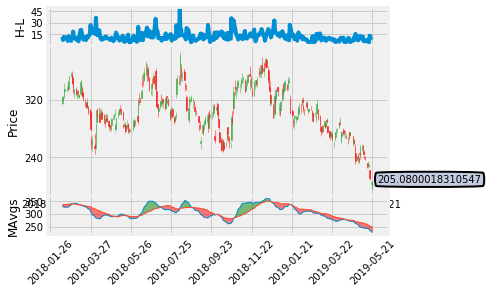

In [23]:
fig = plt.figure()

ax1 = plt.subplot2grid((6,1),(0,0), rowspan=1, colspan=1)
plt.ylabel('H-L')
ax2 = plt.subplot2grid((6,1),(1,0), rowspan=4, colspan=1, sharex = ax1)
plt.ylabel('Price')
#plt.xlabel('Date')
ax3 = plt.subplot2grid((6,1),(5,0), rowspan=1, colspan=1, sharex = ax1)
plt.ylabel('MAvgs')

h_1 = list(map(high_minus_low, highp, lowp))

ax1.plot_date(date[-start:], h_1[-start:], '-')
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.yaxis.set_major_locator(mticker.MaxNLocator(nbins=4, prune='lower'))

candlestick_ohlc(ax2, new_list[-start:], width=.6, colorup='#41ad49', colordown='#ff1717')
ax2.grid(True) #, color = 'm', linestyle='-',linewidth=0.3)
ax2.yaxis.set_major_locator(mticker.MaxNLocator(nbins=5, prune='lower'))

bbox_props = dict(boxstyle='round4, pad=0.3', fc="#c5cbdf", ec='k', lw=2)

ax3.plot(date[-start:], ma1[-start:], linewidth = 1)
ax3.plot(date[-start:], ma2[-start:], linewidth = 1)
ax3.fill_between(date[-start:], ma2[-start:], ma1[-start:], where = (ma2[-start:]>=ma1[-start:]), facecolor='r', edgecolor='r', alpha=0.5)
ax3.fill_between(date[-start:], ma2[-start:], ma1[-start:], where = (ma2[-start:]<=ma1[-start:]), facecolor='g', edgecolor='g', alpha=0.5)

for label in ax3.xaxis.get_ticklabels():
    label.set_rotation(45)
    
ax3.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
ax2.yaxis.set_major_locator(mticker.MaxNLocator(nbins=3, prune='lower'))

#plt.ylabel('Price')

ax2.annotate(str(closep[-1]), (date[-1], closep[-1]),
            xytext = (date[-1]+8, closep[-1]), bbox = bbox_props)

plt.subplots_adjust(left=0.11, bottom=.16, right=.90, top=.95, wspace=.2,hspace=.0)
plt.show()